In [1]:
import geopandas as gpd
import pandas as pd
import datetime 

# define the scope in 3 states

In [2]:
was = gpd.read_file(r'C:\Users\Meixin\fire\washington\tl_2016_53_cousub.shp')

In [3]:
was.head()

,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CNECTAFP,NECTAFP,NCTADVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,53,003,90096,01939443,5300390096,Asotin,Asotin CCD,22,Z5,G4040,None,None,None,S,1340244511,8191372,+46.1474746,-117.1964025,"POLYGON ((-117.47997 46.016307, -117.479914 46..."
1,53,003,90592,01939474,5300390592,Clarkston,Clarkston CCD,22,Z5,G4040,None,None,None,S,307199433,3084334,+46.3442652,-117.3012796,"POLYGON ((-117.42077 46.33866, -117.420733 46...."
2,53,075,90656,01939478,5307590656,Colfax-Palouse,Colfax-Palouse CCD,22,Z5,G4040,None,None,None,S,608990251,10534,+46.8961192,-117.2915620,"POLYGON ((-117.58929 46.86652, -117.58926 46.8..."
3,53,075,91552,01939535,5307591552,LaCrosse,LaCrosse CCD,22,Z5,G4040,None,None,None,S,1318314850,24179160,+46.7282243,-117.8212524,"POLYGON ((-118.249337 46.733842, -118.249122 4..."
4,53,075,92832,01939615,5307592832,Rock Lake,Rock Lake CCD,22,Z5,G4040,None,None,None,S,1577017631,11603165,+47.0541435,-117.7254566,"POLYGON ((-118.005063 46.843602, -118.004978 4..."


In [4]:
was_whole = was.dissolve(by='STATEFP')

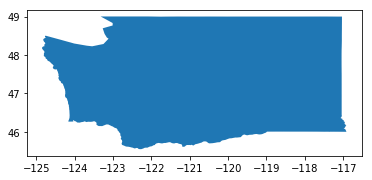

In [6]:
was_whole.plot()

In [7]:
ore = gpd.read_file(r'C:\Users\Meixin\fire\oregon\tl_2016_41_cousub.shp')
ore_whole = ore.dissolve(by='STATEFP')

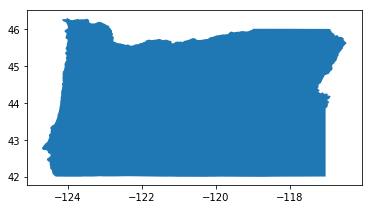

In [8]:
ore_whole.plot()

In [9]:
cali = gpd.read_file(r'C:\Users\Meixin\fire\california\tl_2016_06_cousub.shp')
cali_whole = cali.dissolve(by='STATEFP')

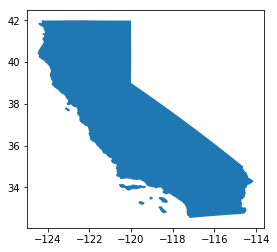

In [10]:
cali_whole.plot()

In [11]:
cali_whole

,geometry,COUNTYFP,COUSUBFP,COUSUBNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CNECTAFP,NECTAFP,NCTADVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
STATEFP,,,,,,,,,,,,,,,,,,
06,"(POLYGON ((-119.636068 33.280713, -119.634795 ...",037,91400,01935145,0603791400,Inglewood,Inglewood CCD,22,Z5,G4040,None,None,None,S,76204791,279897,+33.9226389,-118.3350379


# preprocessing fire data

In [36]:
Filename = r'fire_shapefile\2014\modis_fire_2014_365_conus.dbf'
Table = gpd.read_file(Filename)

In [37]:
df_s = Table.drop(['AREA','PERIMETER','FIRE_','FIRE_ID','JULIAN','GMT','SPIX','TPIX','SRC','SAT_SRC','FRP'], axis=1)

In [38]:
def state_number(row):
    geo = row['geometry']
    if geo.within(cali_whole.geometry[0]):
        row['state'] = 1
    elif geo.within(ore_whole.geometry[0]):
        row['state'] = 2
    elif geo.within(was_whole.geometry[0]):
        row['state'] = 3
    return row
df_s = df_s.apply(state_number,axis = 1)
df_s = df_s.dropna()

In [39]:
df_s['DATE'] = pd.to_datetime(df_s['DATE'])
df_s['Month'] = df_s['DATE'].dt.month
df_s.to_csv('2014.csv',index = False)

In [19]:
df_s.head()

,LAT,LONG,DATE,TEMP,CONF,geometry,Month
658,48.976,-122.170,2016-08-25,316.4,70,POINT (-122.17 48.9760000009339),8
665,48.972,-119.071,2016-05-18,323.7,69,POINT (-119.071 48.972000000934),5
669,48.970,-119.089,2016-05-13,315.9,76,POINT (-119.089 48.970000000934),5
674,48.966,-119.087,2016-05-17,312.4,72,POINT (-119.087 48.966000000934),5
675,48.966,-119.085,2016-05-17,300.8,36,POINT (-119.085 48.966000000934),5


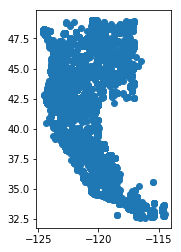

In [27]:
df_s.plot()

In [40]:
list_of_locations = {
    "Washington": {"lat": 47.7511, "lon": -120.7401},
    "Oregon": {"lat": 43.8041, "lon": -120.5542},
    "California": {"lat": 36.7783, "lon": -119.4179},
}
[i for i in list_of_locations]

['Washington', 'Oregon', 'California']

In [41]:
monthList = ["Jan","Feb","March","Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]
monthList.index('Jan')

0

In [42]:
df_s

,CONF,DATE,LAT,LONG,TEMP,geometry,state,Month
1584,71,2014-09-16,49.002,-122.400,312.6,POINT (-122.4 49.0020000009404),3.0,9
1601,67,2014-11-07,48.996,-118.149,308.3,POINT (-118.149 48.9960000009405),3.0,11
1661,60,2014-10-09,48.971,-118.630,304.3,POINT (-118.63 48.9710000009406),3.0,10
1676,53,2014-10-09,48.968,-118.643,302.6,POINT (-118.643 48.9680000009406),3.0,10
1701,85,2014-10-09,48.965,-118.626,327.8,POINT (-118.626 48.9650000009406),3.0,10
1702,81,2014-10-09,48.965,-118.626,327.7,POINT (-118.626 48.9650000009406),3.0,10
1713,65,2014-05-02,48.959,-118.150,310.9,POINT (-118.15 48.9590000009407),3.0,5
1714,44,2014-05-02,48.959,-118.150,310.9,POINT (-118.15 48.9590000009407),3.0,5
1715,44,2014-05-02,48.959,-118.150,310.9,POINT (-118.15 48.9590000009407),3.0,5
1723,49,2014-05-02,48.957,-118.146,311.4,POINT (-118.146 48.9570000009407),3.0,5


In [46]:
df_s[['CONF','DATE']]

,CONF,DATE
1584,71,2014-09-16
1601,67,2014-11-07
1661,60,2014-10-09
1676,53,2014-10-09
1701,85,2014-10-09
1702,81,2014-10-09
1713,65,2014-05-02
1714,44,2014-05-02
1715,44,2014-05-02
1723,49,2014-05-02


In [59]:
df = pd.read_csv(
    '/Users/Meixin/fire/clusters_csv_data/cluster_over_month.csv',  #date 2017-09-07 to 2017-10-10
    dtype={"lon" : "float64","lat" : "float64","num" : "int","month" : "object"},
)

In [60]:
sum(df.num)

23084

In [65]:
df_m = pd.read_csv(
    '/Users/Meixin/fire/over_month_csv_data/states_over_month.csv',  #date 2017-09-07 to 2017-10-10
    dtype={'month':'object','num':'int','state':'object'},
)
location = 'California'
for i in range(12):
    x = df_m[(df_m.month == 'Jan') &( df_m.state==location)].num
    print(x)

0    1294
Name: num, dtype: int32
0    1294
Name: num, dtype: int32
0    1294
Name: num, dtype: int32
0    1294
Name: num, dtype: int32
0    1294
Name: num, dtype: int32
0    1294
Name: num, dtype: int32
0    1294
Name: num, dtype: int32
0    1294
Name: num, dtype: int32
0    1294
Name: num, dtype: int32
0    1294
Name: num, dtype: int32
0    1294
Name: num, dtype: int32
0    1294
Name: num, dtype: int32


In [63]:
df_m

,month,num,state
0,Jan,1294,California
1,Feb,2000,California
2,Mar,1772,California
3,Apr,1657,California
4,May,1533,California
5,Jun,3174,California
6,Jul,10303,California
7,Aug,36820,California
8,Sep,17175,California
9,Oct,7173,California
